Training with Mini-Batch Gradient Descent...
Training with Batch Gradient Descent...
Training with Stochastic Gradient Descent...
Mini-Batch Gradient Descent - Mean Squared Error: 72038.27093734122
Batch Gradient Descent - Mean Squared Error: 72038.27093734122
Stochastic Gradient Descent - Mean Squared Error: 72038.27093734122


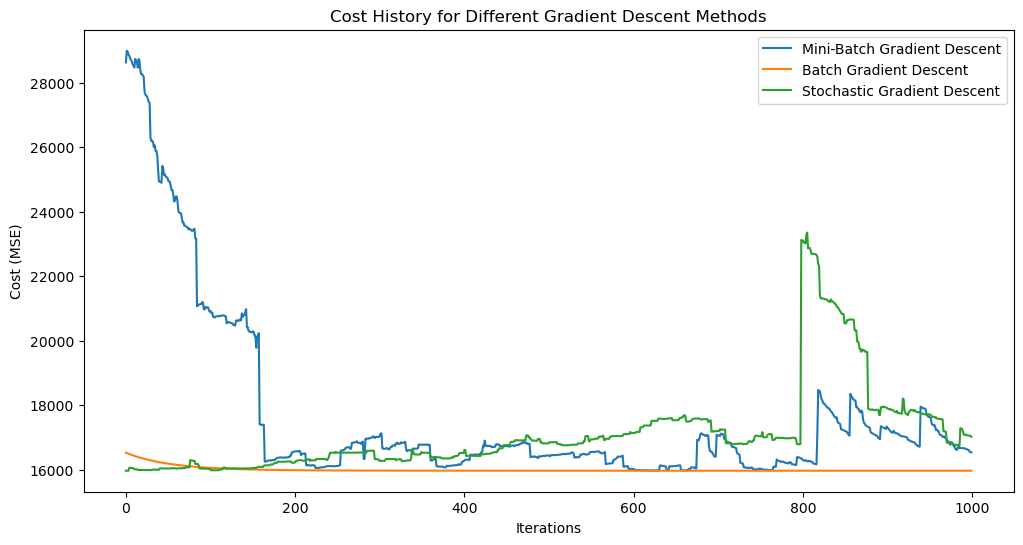

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Superstore - Superstore.csv')

# Prepare the data for machine learning
# Features: Sales, Quantity, Discount
# Target: Profit
X = df[['Sales', 'Quantity', 'Discount']]
y = df['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for gradient descent)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (intercept) to the features
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient Descent Algorithm
def gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size=None):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        if batch_size is None:  # Batch Gradient Descent
            gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        elif batch_size == 1:  # Stochastic Gradient Descent
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y.iloc[random_index:random_index + 1]  # Use .iloc to avoid KeyError
            gradients = xi.T.dot(xi.dot(theta) - yi)
        else:  # Mini-Batch Gradient Descent
            random_indices = np.random.choice(m, batch_size, replace=False)  # Ensure unique indices
            xi = X[random_indices]
            yi = y.iloc[random_indices]  # Use .iloc to avoid KeyError
            gradients = (1 / batch_size) * xi.T.dot(xi.dot(theta) - yi)

        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Initialize parameters
theta = np.zeros(X_train_scaled.shape[1])  # Initialize weights (including bias)
learning_rate = 0.01
num_iterations = 1000

# Mini-Batch Gradient Descent
print("Training with Mini-Batch Gradient Descent...")
theta_mini_batch, cost_history_mini_batch = gradient_descent(
    X_train_scaled, y_train, theta, learning_rate, num_iterations, batch_size=32
)

# Batch Gradient Descent
print("Training with Batch Gradient Descent...")
theta_batch, cost_history_batch = gradient_descent(
    X_train_scaled, y_train, theta, learning_rate, num_iterations, batch_size=None
)

# Stochastic Gradient Descent
print("Training with Stochastic Gradient Descent...")
theta_stochastic, cost_history_stochastic = gradient_descent(
    X_train_scaled, y_train, theta, learning_rate, num_iterations, batch_size=1
)

# Evaluate the models
def evaluate_model(theta, X_test, y_test):
    predictions = X_test.dot(theta)
    mse = mean_squared_error(y_test, predictions)
    return mse

# Evaluate Mini-Batch Gradient Descent
mse_mini_batch = evaluate_model(theta_mini_batch, X_test_scaled, y_test)
print(f"Mini-Batch Gradient Descent - Mean Squared Error: {mse_mini_batch}")

# Evaluate Batch Gradient Descent
mse_batch = evaluate_model(theta_batch, X_test_scaled, y_test)
print(f"Batch Gradient Descent - Mean Squared Error: {mse_batch}")

# Evaluate Stochastic Gradient Descent
mse_stochastic = evaluate_model(theta_stochastic, X_test_scaled, y_test)
print(f"Stochastic Gradient Descent - Mean Squared Error: {mse_stochastic}")

# Plot the cost history for each method
plt.figure(figsize=(12, 6))
plt.plot(cost_history_mini_batch, label='Mini-Batch Gradient Descent')
plt.plot(cost_history_batch, label='Batch Gradient Descent')
plt.plot(cost_history_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost History for Different Gradient Descent Methods')
plt.legend()
plt.show()